Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

^ model parameters

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw  α = learning rate

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

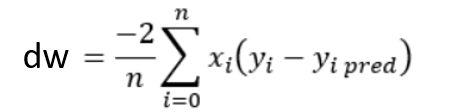

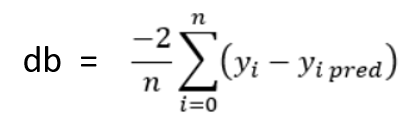

In [33]:
# importing numpy library
import numpy as np

# **Linear Regression (by me)**

In [34]:
# an object is kinda like a template
# methods are functions in a class

class Linear_Regression():

  # initiating the parameters (learning rate & # of iterations -> hyperparameteres)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # number of training examples & number of features

    self.m, self.n = X.shape # number of rows & columns

    # initiating the wright & bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = -2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  # line function
  def predict(self, X):

    return X.dot(self.w) + self.b



# Workflow


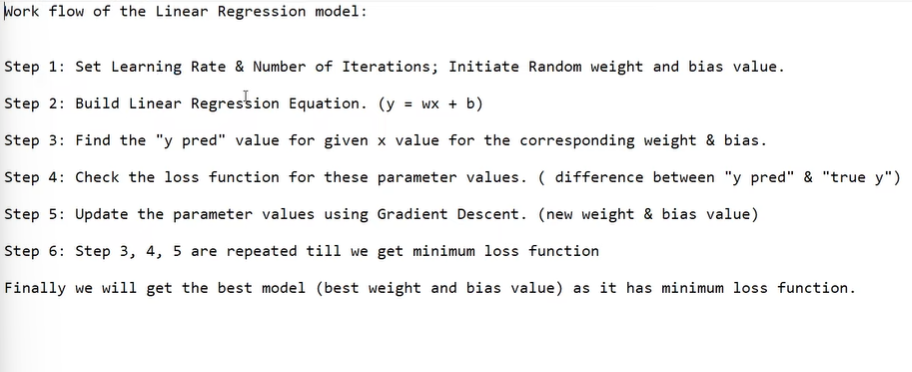

# Using Linear Regressions for Prediction

In [35]:
# importing the dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



## Data Pre-Processing

In [36]:
# loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('/content/salary_data.csv')

In [37]:
# printing the first 5 rows of dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [38]:
# printing the last 5 rows of dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [39]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [40]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Splitting the feature

In [41]:
X = salary_data.iloc[:, :-1].values # rows , cols
Y = salary_data.iloc[:, 1].values

In [42]:
# year
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [43]:
# salary
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


## Splitting the dataset into test & train

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

## Training our linear regression model

In [45]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [46]:
model.fit(X_train, Y_train)


In [47]:
# printing the parameters values (weights & bias)

print(f'weight = {model.w[0]}')
print(f'bias = {model.b}')

weight = 9514.400999035135
bias = 23697.406507136307


So our linear eq is

**y = 9514(x) + 23697**

**salary = 9514(experience) + 23697**


## Predict the salary value for test data

In [48]:
test_data_prediction = model.predict(X_test)

In [49]:
# this is what the model predicted, so now we compare it to Y_test
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


## Visualizing the predicted values & actual values

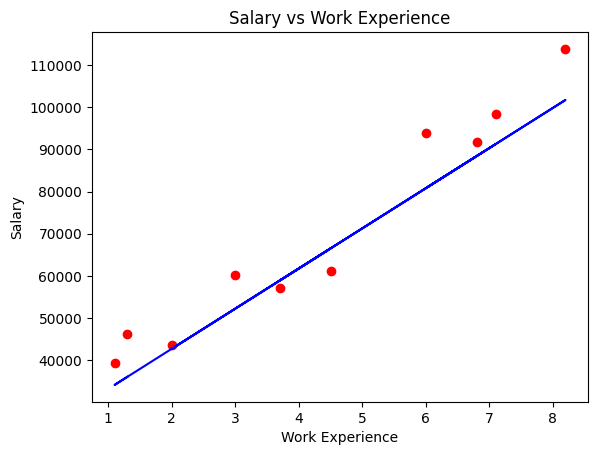

In [52]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title("Salary vs Work Experience")
plt.show()

# **Linear Regression (not by me)**

In [51]:
# class Linear_Regression():

#   # initiating the parameters (learning rate & no. of iterations)
#   def __init__(self, learning_rate, no_of_iterations):

#     self.learning_rate = learning_rate
#     self.no_of_iterations = no_of_iterations


#   def fit(self, X, Y ):

#     # number of training examples & number of features

#     self.m, self.n = X.shape  # number of rows & columns

#     # initiating the weight and bias

#     self.w = np.zeros(self.n)
#     self.b = 0
#     self.X = X
#     self.Y = Y

#     # implementing Gradient Descent

#     for i in range(self.no_of_iterations):
#       self.update_weights()


#   def update_weights(self):

#     Y_prediction = self.predict(self.X)

#     # calculate gradients

#     dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

#     db = - 2 * np.sum(self.Y - Y_prediction)/self.m

#     # upadating the weights

#     self.w = self.w - self.learning_rate*dw
#     self.b = selb.b - self.learning_rate*db


#   def predict(self, X):

#     return X.dot(self.w) + self.b

